# Exploratory Data Analysis: Bivariate Analysis

## Objective
The objective of this notebook is to analyze the relationship between independent variables and the target variable to identify patterns and dependencies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/processed/housing_cleaned.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


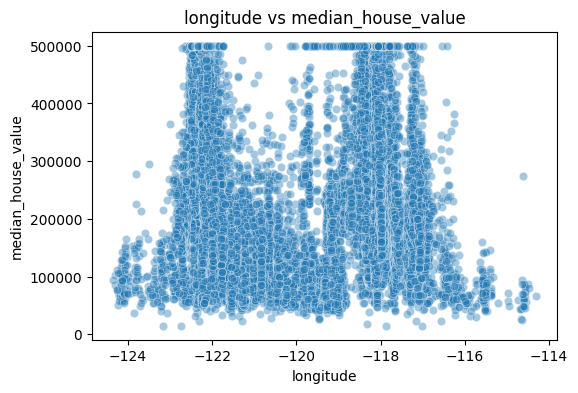

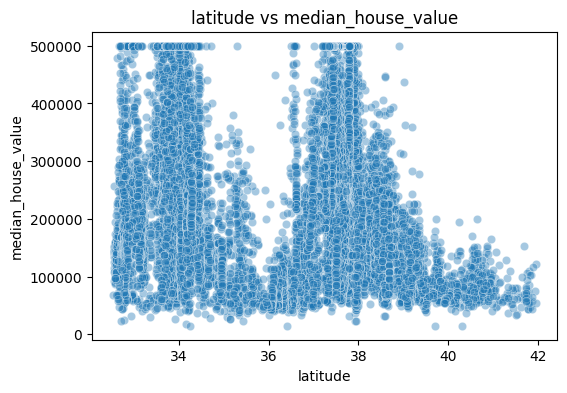

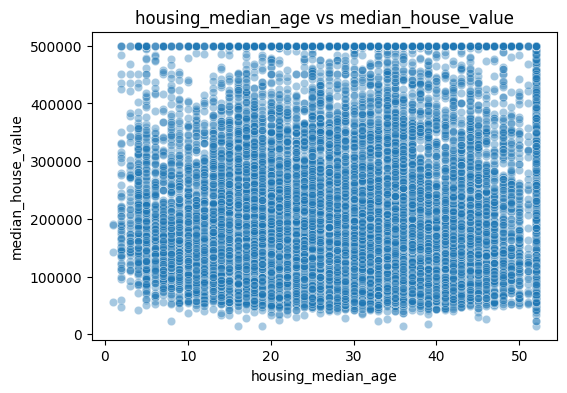

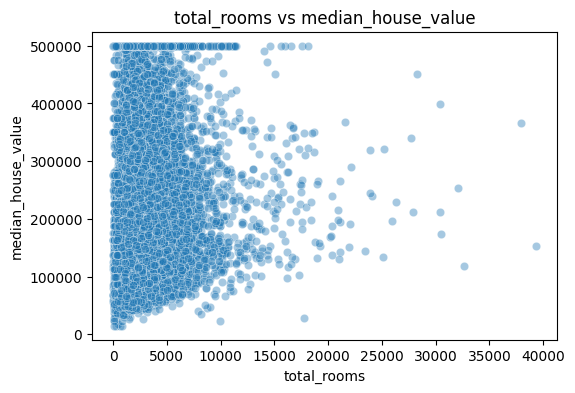

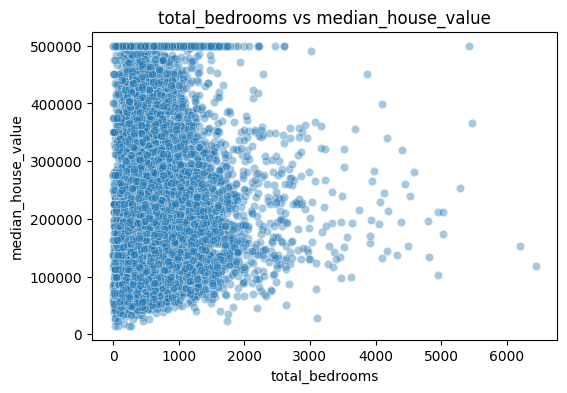

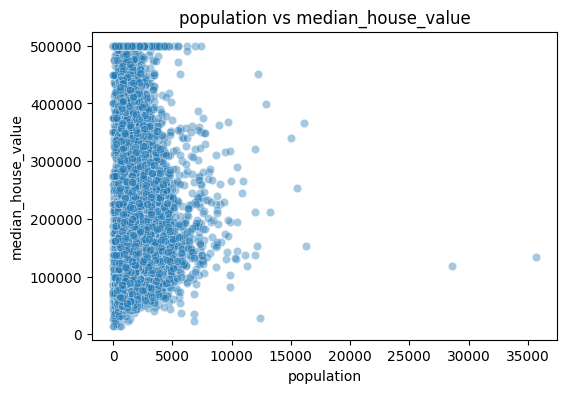

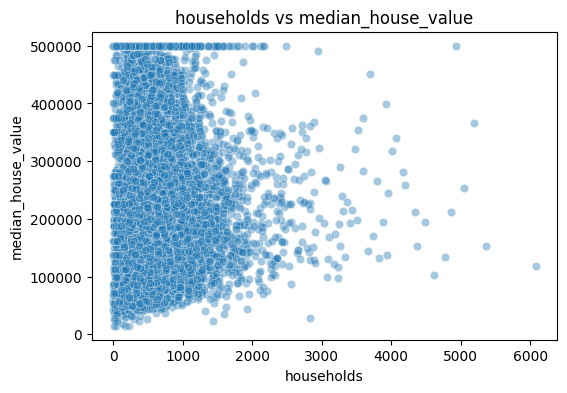

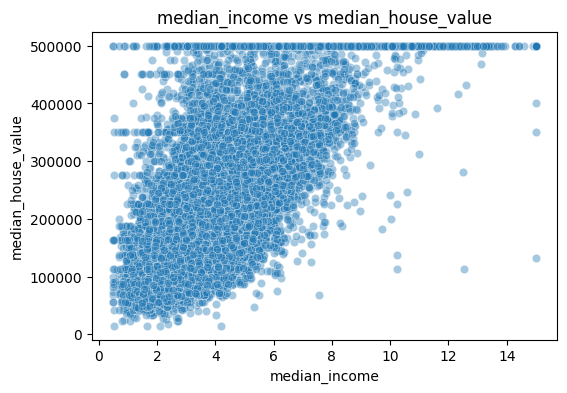

In [3]:
target = "median_house_value"
numerical_features = df.select_dtypes(include=[np.number]).columns.drop(target)

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df[target], alpha=0.4)
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

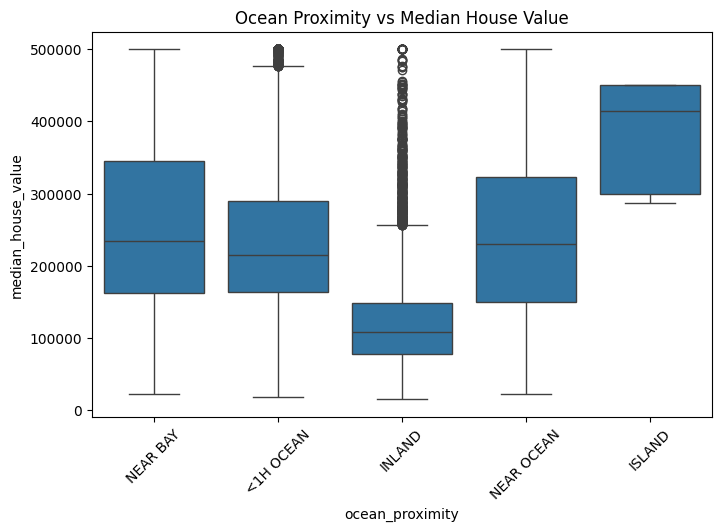

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(x="ocean_proximity", y=target, data=df)
plt.xticks(rotation=45)
plt.title("Ocean Proximity vs Median House Value")
plt.show()

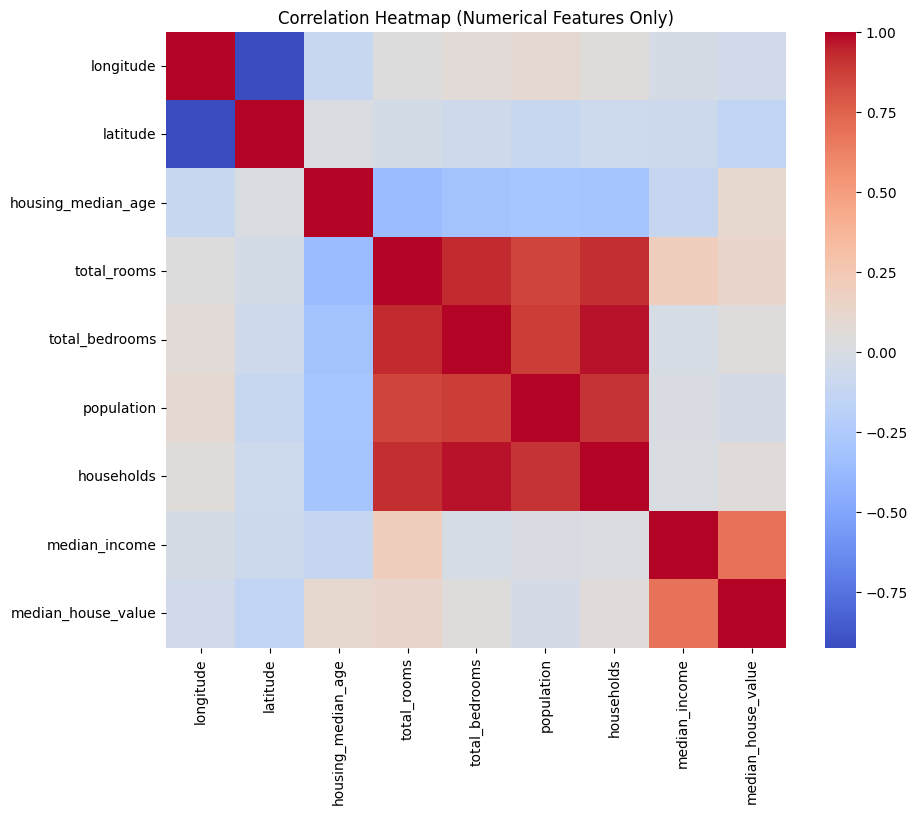

In [5]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

## Bivariate Insights

- `median_income` shows a strong positive correlation with house prices.
- Location-based features such as latitude and longitude influence the target.
- Some features show weak or non-linear relationships.
- Correlated features indicate potential multicollinearity, which can be addressed using regularization.

In [7]:
# Detect outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Count of outliers per column
outliers_count = outliers.sum()
print(outliers_count)

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1287
total_bedrooms        1306
population            1196
households            1220
median_income          681
dtype: int64


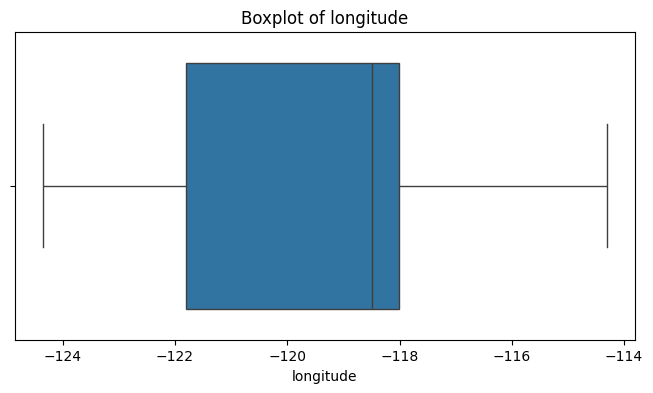

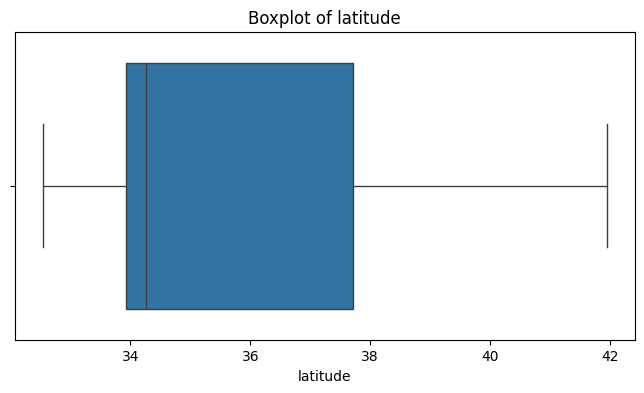

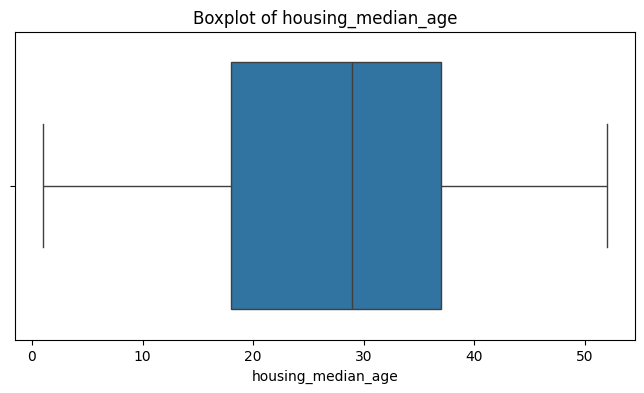

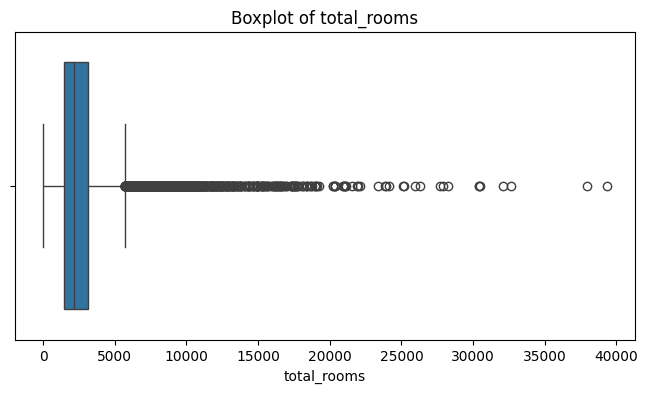

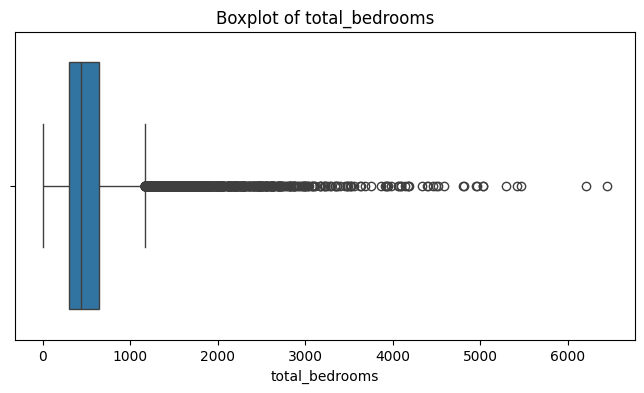

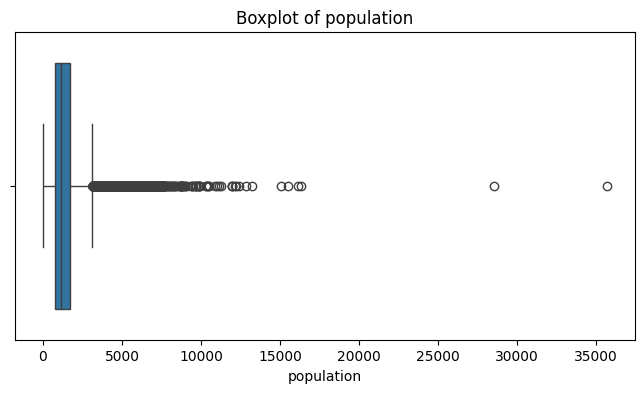

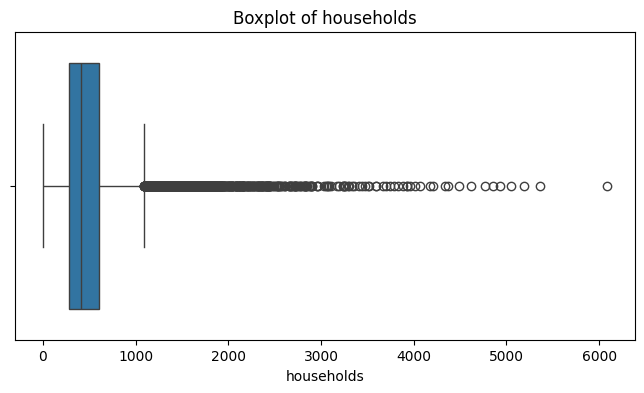

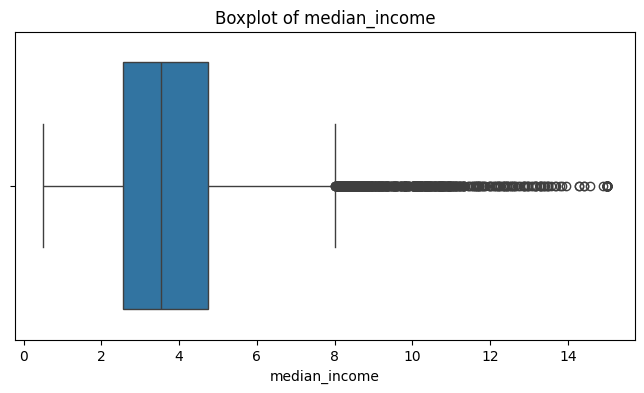

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
for col in numerical_features:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

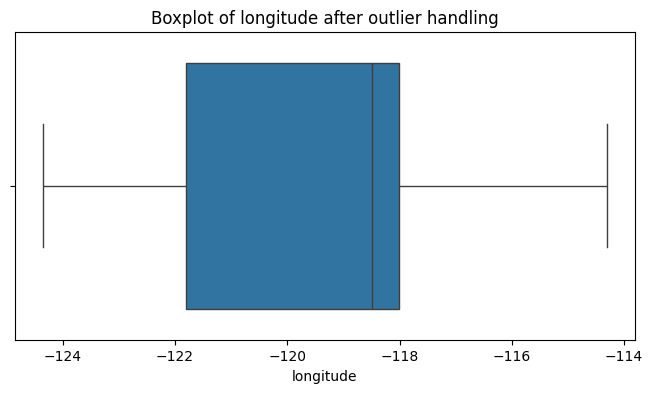

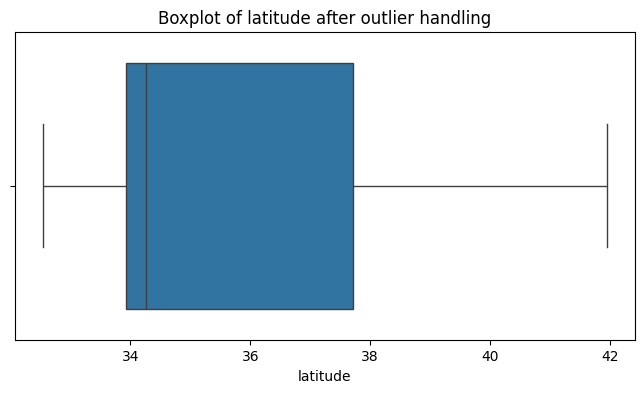

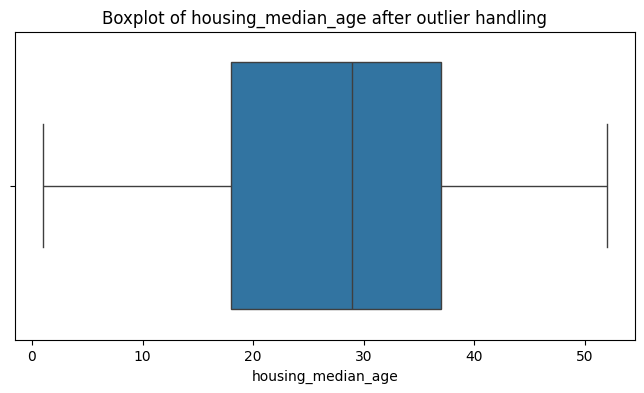

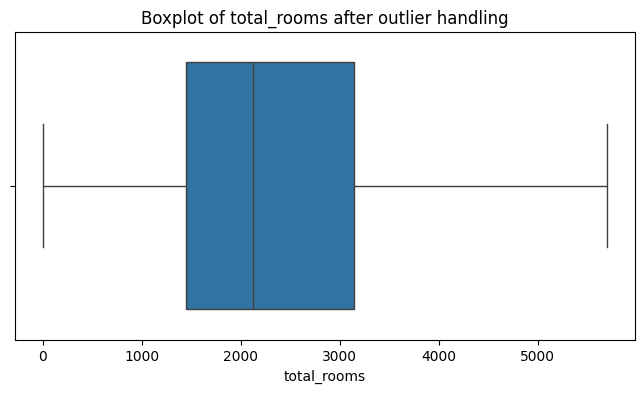

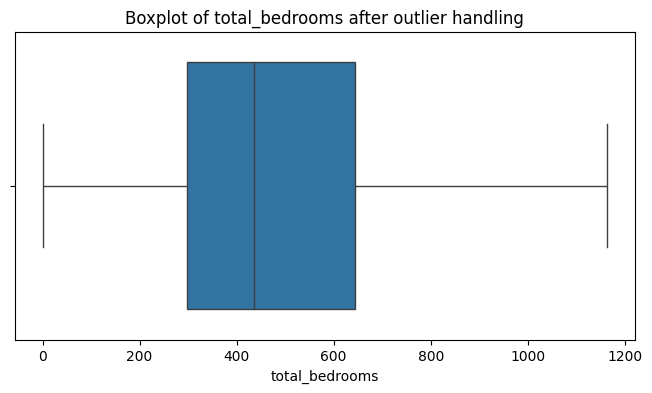

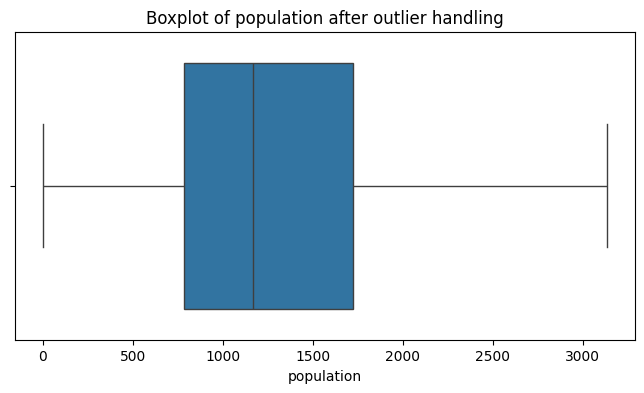

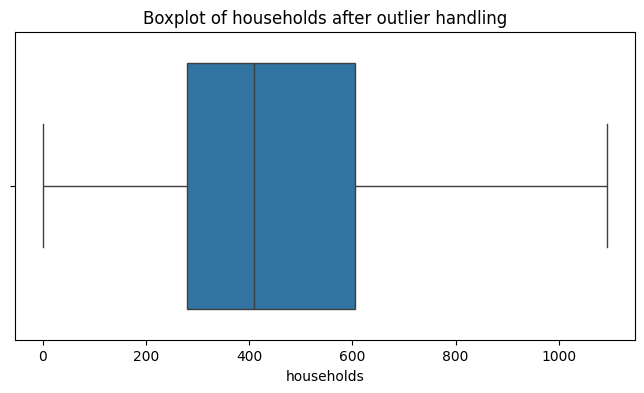

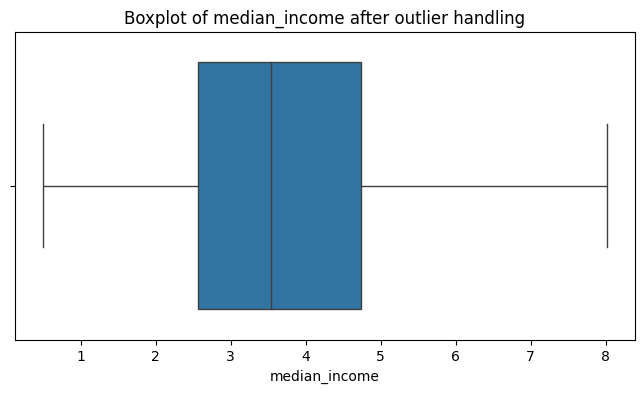

In [10]:
for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.show()
